In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.optimizers import Adam
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D
from keras.layers.advanced_activations import LeakyReLU 
from keras.preprocessing.image import ImageDataGenerator


In [ ]:

#It is always a good idea to initialize the random number generator to a constant to ensure that the results of your 
#script are reproducible.
#np.random.seed(25)

In [135]:
(A_train, B_train), (A_test, B_test) = mnist.load_data()

print("X_train original shape", A_train.shape)
print("y_train original shape", B_train.shape)
print("X_test original shape", A_test.shape)
print("y_test original shape", B_test.shape)

X_train original shape (500, 28, 28)
y_train original shape (500,)
X_test original shape (100, 28, 28)
y_test original shape (100,)


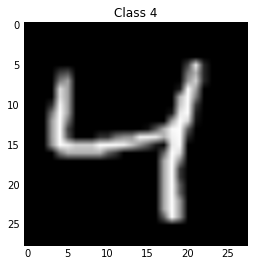

In [148]:
plt.imshow(A_train[3], cmap='gray')
plt.title('Class '+ str(B_train[3]))

In [ ]:
#take only a subset of data on Desktop computer
X_train = A_train[:500]
y_train = B_train[:500]
X_test = A_test[:100]
y_test = B_test[:100]

print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)
print("X_test original shape", X_test.shape)
print("y_test original shape", y_test.shape)

In [137]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

#Copy of the array, cast to a specified type.
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)
print("X_test original shape", X_test.shape)
print("y_test original shape", y_test.shape)

(500, 28, 28, 1)

In [ ]:

X_train/=255
X_test/=255


In [138]:
number_of_classes = 10

Y_train = np_utils.to_categorical(y_train, number_of_classes)
Y_test = np_utils.to_categorical(y_test, number_of_classes)

y_train[0], Y_train[0]
# [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.] since the label representated by it is 5.

(5, array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32))

In [139]:
# Three steps to Convolution
# 1. Convolution
# 2. Activation
# 3. Polling
# Repeat Steps 1,2,3 for adding more hidden layers

# 4. After that make a fully connected network
# This fully connected network gives ability to the CNN
# to classify the samples

model = Sequential()

# in our first layer, 32 is number of filters and (3, 3) is the size of the filter.
#We also need to specify the shape of the input which is (28, 28, 1), but we have to specify it only once.
model.add(Conv2D(32, (3, 3), input_shape=(28,28,1)))

#The second layer is the Activation layer. We have used ReLU (rectified linear unit) as our activation function. 
#ReLU function is f(x) = max(0, x), where x is the input. It sets all negative values in the matrix ‘x’ to 0 and keeps all 
#the other values constant. It is the most used activation function since it reduces training time and prevents the problem
#of vanishing gradients.
model.add(Activation('relu'))
#It’s a best practice to always do BatchNormalization. BatchNormalization normalizes the matrix after it is been through a 
#convolution layer so that the scale of each dimension remains the same. It reduces the training time significantly.
BatchNormalization(axis=-1)

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
#The third layer is the MaxPooling layer. MaxPooling layer is used to down-sample the input to enable the model to make assumptions
#about the features so as to reduce over-fitting. It also reduces the number of parameters to learn, reducing the training time.
model.add(MaxPooling2D(pool_size=(2,2)))
BatchNormalization(axis=-1)

model.add(Conv2D(64,(3, 3)))
model.add(Activation('relu'))
BatchNormalization(axis=-1)

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
BatchNormalization()

# Fully connected layer
#After creating all the convolutional layers, we need to flatten them, so that they can act as an input to the Dense layers.


model.add(Dense(512))
model.add(Activation('relu'))
BatchNormalization()

model.add(Dropout(0.2))
model.add(Dense(10))

# model.add(Convolution2D(10,3,3, border_mode='same'))
# model.add(GlobalAveragePooling2D())
model.add(Activation('softmax'))

In [140]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
activation_25 (Activation)   (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
activation_26 (Activation)   (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 10, 10, 64)        18496     
_________________________________________________________________
activation_27 (Activation)   (None, 10, 10, 64)        0         
__________

In [141]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [142]:
gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                         height_shift_range=0.08, zoom_range=0.08)

test_gen = ImageDataGenerator()

In [143]:
train_generator = gen.flow(X_train, Y_train, batch_size=64)
test_generator = test_gen.flow(X_test, Y_test, batch_size=64)

In [144]:
# model.fit(X_train, Y_train, batch_size=128, nb_epoch=1, validation_data=(X_test, Y_test))

#train_steps =60000//64

#test_steps =10000//64

train_steps =500//64
test_steps = 100//64
model.fit_generator(train_generator, steps_per_epoch=train_steps, epochs=5, 
                    validation_data=test_generator, validation_steps=test_steps)

Epoch 1/5
7/7 [==============================] - 5s 718ms/step - loss: 2.2538 - acc: 0.1792 - val_loss: 1.9734 - val_acc: 0.3438
Epoch 2/5
7/7 [==============================] - 3s 392ms/step - loss: 1.7333 - acc: 0.4543 - val_loss: 0.8757 - val_acc: 0.7344
Epoch 3/5
7/7 [==============================] - 2s 349ms/step - loss: 1.2441 - acc: 0.5804 - val_loss: 0.4888 - val_acc: 0.8906
Epoch 4/5
7/7 [==============================] - 2s 283ms/step - loss: 0.8998 - acc: 0.7106 - val_loss: 0.4117 - val_acc: 0.9219
Epoch 5/5
7/7 [==============================] - 2s 264ms/step - loss: 0.7632 - acc: 0.7424 - val_loss: 0.2368 - val_acc: 0.9219


In [124]:
score = model.evaluate(X_test, Y_test)
print()
print('Test accuracy: ', score[1])

100/100 [==============================] - 0s 1ms/step

Test accuracy:  0.87


In [125]:
predictions = model.predict_classes(X_test)

predictions = list(predictions)
actuals = list(y_test)

sub = pd.DataFrame({'Actual': actuals, 'Predictions': predictions})
sub.to_csv('./output_cnn.csv', index=False)

# Pseudo Labelling

In [126]:
class MixIterator(object):
    def __init__(self, iters):
        self.iters = iters
        self.N = sum([it.n for it in self.iters])

    def reset(self):
        for it in self.iters: it.reset()

    def __iter__(self):
        return self

    def __next__(self, *args, **kwargs):
        nexts = [next(it) for it in self.iters]
        n0 = np.concatenate([n[0] for n in nexts])
        n1 = np.concatenate([n[1] for n in nexts])
        return (n0, n1)

In [127]:
predictions = model.predict(X_test, batch_size=64)

predictions[:5]

array([[4.4791182e-06, 3.9126870e-05, 2.4385603e-05, 6.3821528e-04,
        3.8476646e-05, 1.8717974e-04, 1.7587908e-07, 9.9417818e-01,
        8.5965366e-05, 4.8036859e-03],
       [9.9890698e-03, 1.0626199e-02, 9.0801287e-01, 7.1634207e-04,
        2.9543535e-05, 2.9063947e-03, 7.6932847e-03, 5.9164235e-05,
        5.9958290e-02, 8.8991837e-06],
       [1.5443397e-06, 9.9639267e-01, 2.5603088e-04, 1.7902947e-05,
        3.0264171e-04, 9.3455063e-05, 1.2906938e-04, 9.8291982e-04,
        1.1662709e-03, 6.5746420e-04],
       [9.8622280e-01, 1.1517895e-07, 4.1696662e-04, 3.4431170e-05,
        3.6181696e-05, 6.4431136e-03, 3.9464789e-03, 2.6221359e-03,
        1.4684658e-04, 1.3082684e-04],
       [5.4472857e-05, 6.4785354e-07, 2.2381525e-04, 2.7942028e-06,
        9.9577290e-01, 1.1665102e-04, 3.8700586e-04, 5.5118988e-04,
        1.3148156e-05, 2.8773865e-03]], dtype=float32)

In [128]:
# gen = ImageDataGenerator()

batches = gen.flow(X_train, Y_train, batch_size=48)
test_batches = test_gen.flow(X_test, predictions, batch_size=16)

In [129]:
mi = MixIterator([batches, test_batches])

mi.N

600

In [130]:
model.fit_generator(mi, steps_per_epoch=mi.N//64, epochs=5, validation_data=(X_test, Y_test))

Epoch 1/5
9/9 [==============================] - 3s 299ms/step - loss: 0.6059 - acc: 0.8346 - val_loss: 0.2810 - val_acc: 0.9300
Epoch 2/5
9/9 [==============================] - 2s 252ms/step - loss: 0.5502 - acc: 0.8405 - val_loss: 0.2304 - val_acc: 0.9400
Epoch 3/5
9/9 [==============================] - 2s 235ms/step - loss: 0.5742 - acc: 0.8579 - val_loss: 0.2483 - val_acc: 0.9500
Epoch 4/5
9/9 [==============================] - 2s 248ms/step - loss: 0.4670 - acc: 0.8580 - val_loss: 0.2234 - val_acc: 0.9400
Epoch 5/5
9/9 [==============================] - 2s 246ms/step - loss: 0.4134 - acc: 0.9097 - val_loss: 0.2794 - val_acc: 0.9100


In [131]:
model

In [132]:
model_json = model.to_json()
with open("model_json", "w") as json_file:
  json_file.write(model_json)
model.save_weights("model.h5")

In [155]:
data = X_test[:1]
predicted_classes = model.predict_classes(data)
print(predicted_classes)


[7]


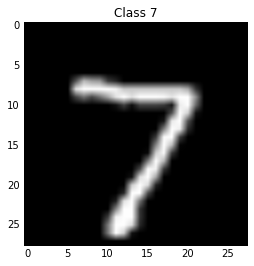

In [156]:
plt.imshow(A_test[0], cmap='gray')
plt.title('Class '+ str(B_test[0]))